**Analysis for snow cover all over the world**<br>
The data here is 8-day data and analysis is done for 1x1 degree

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as sm
import scipy
import datetime as dt

In [ ]:
SNOWCOVER_PATH="snowcover/data/" # path for snow cover data
COVID_PATH="covidoxford/data/" # path for covidoxford data

In [ ]:
sc_df=pd.read_csv(SNOWCOVER_PATH+"all_locations_1degx1deg_snowcover.csv")
sc_df["metric"].unique()

array(['Eight_Day_CMG_Snow_Cover'], dtype=object)

In [ ]:
metric_df=sc_df[(sc_df["metric"]=="Eight_Day_CMG_Snow_Cover")&(sc_df["mean"]>=0)&(sc_df["mean"]<=100)&(~sc_df["mean"].isna())]

**Locations with snow over the globe -> 18079**

In [ ]:
valid_locations=metric_df[(metric_df["mean"]>=5)]["location"].unique().tolist()
print("locations with snow =",len(valid_locations))
metric_df=metric_df[metric_df["location"].isin(valid_locations)]

locations with snow = 18079


**average change in snow cover across the year**<br>
Analysis for 12 months and as data is at every 8-day hence mapped to 4 weeks a month for 2019 and 2020. Average change on snow cover across globe is analysed here. 

In [ ]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,5):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=100:
            x.append((month-1)*4+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",values1[-1],"2020 =",values2[-1])

 month = 1  week = 1 2019 = 72.54182644510723 2020 = 70.6965629882119
 month = 1  week = 2 2019 = 71.55190383546415 2020 = 72.59894385769873
 month = 1  week = 3 2019 = 74.62597558535121 2020 = 72.77279701154026
 month = 1  week = 4 2019 = 74.06153057300347 2020 = 71.9649403922574
 month = 2  week = 1 2019 = 71.80652466642184 2020 = 74.51891296364305
 month = 2  week = 2 2019 = 73.75454274649985 2020 = 73.80262138814417
 month = 2  week = 3 2019 = 75.6956951141579 2020 = 73.8624295590542
 month = 3  week = 1 2019 = 74.62237603540224 2020 = 71.92891183478952
 month = 3  week = 2 2019 = 74.33113354037268 2020 = 72.51979813664596
 month = 3  week = 3 2019 = 73.7492671054815 2020 = 70.8619945793462
 month = 4  week = 1 2019 = 70.56662426019139 2020 = 71.39039769898777
 month = 4  week = 2 2019 = 69.272194258532 2020 = 70.08025886387522
 month = 4  week = 3 2019 = 66.50118922506776 2020 = 67.15039548647603
 month = 4  week = 4 2019 = 64.97892582554344 2020 = 65.05298965650755
 month = 5  we

Not much change in snow cover is visible. Although chnage for weeks in Feb and march months is there (different places started lockdown at different time), but nothing strong can be said from this. 

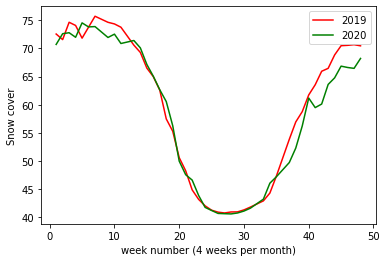

In [ ]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Snow cover")
plt.show()

**For every month what is the average change in snow peak cover is shown.**

In [ ]:
metric_df["prev_mean"]=metric_df.groupby("location")["mean"].shift(1)
metric_df["change"]=metric_df["mean"]-metric_df["prev_mean"]
metric_df["change"]=metric_df["change"].fillna(0.0)

In [ ]:
metric_df_2019=metric_df[metric_df["week"].str.contains("2019")]
metric_df_2019["avg_change"]=metric_df_2019.groupby("week")["change"].transform("mean")
metric_df_2020=metric_df[metric_df["week"].str.contains("2020")]
metric_df_2020["avg_change"]=metric_df_2020.groupby("week")["change"].transform("mean")

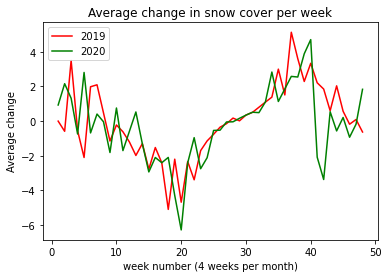

In [ ]:
change_2019=metric_df_2019.set_index("week")["avg_change"].to_dict()
change_2020=metric_df_2020.set_index("week")["avg_change"].to_dict()
x_2019=[]
y_2019=[]
x_2020=[]
y_2020=[]
for month in range(1,13):
    for week in range(1,5):
        week_2019=str(month)+".2019.week"+str(week)
        week_2020=str(month)+".2020.week"+str(week)
        week_no=(month-1)*4+week
        if week_2019 in change_2019:
            x_2019.append(week_no)
            y_2019.append(change_2019[week_2019])
        if week_2020 in change_2020:
            x_2020.append(week_no)
            y_2020.append(change_2020[week_2020])
plt.plot(x_2019,y_2019,label="2019",color="red")
plt.plot(x_2020,y_2020,label="2020",color="green")
plt.legend()
plt.title("Average change in snow cover per week")
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Average change")
plt.show()

In [ ]:
week1="3.2019.week1"
week2="5.2019.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="5.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                 2.256e+04
Date:                Tue, 02 Nov 2021   Prob (F-statistic):               0.00
Time:                        04:00:30   Log-Likelihood:            -1.7109e+05
No. Observations:               35626   AIC:                         3.422e+05
Df Residuals:                   35623   BIC:                         3.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5091      0.375     -6.684      0.0

**Regression does show probable increase of snow cover of 3 points during middle months of 2020 compared to 2019. However, it is very tough to conclude anything from this.**